업계 표준 RFM 분석 시작! 🎯
RFM 데이터 로딩: 2500명
기본 통계:
           Recency    Frequency      Monetary
count  2500.000000  2500.000000   2500.000000
mean     25.574000   110.593600   3222.985232
std      62.790655   115.669368   3349.026076
min       0.000000     1.000000      8.170000
25%       1.000000    39.000000    970.740000
50%       6.000000    79.000000   2157.750000
75%      20.000000   142.250000   4413.320000
max     657.000000  1300.000000  38319.790000
표준 RFM 점수 계산 완료!
RFM 조합 예시: 0    334
1    123
2    323
3    112
4    322
Name: RFM, dtype: object
표준 세그먼트 분류 완료!
=== 업계 표준 RFM 세그먼트 분포 ===
세그먼트                 고객수      비율(%)   
----------------------------------------
Lost                 1204     48.2    
Champions            562      22.5    
Loyal Customers      274      11.0    
Potential Loyalists  175      7.0     
Cannot Lose Them     95       3.8     
New Customers        91       3.6     
Hibernating          56       2.2     
At Risk              43       1.7     

=== 세그먼트별 

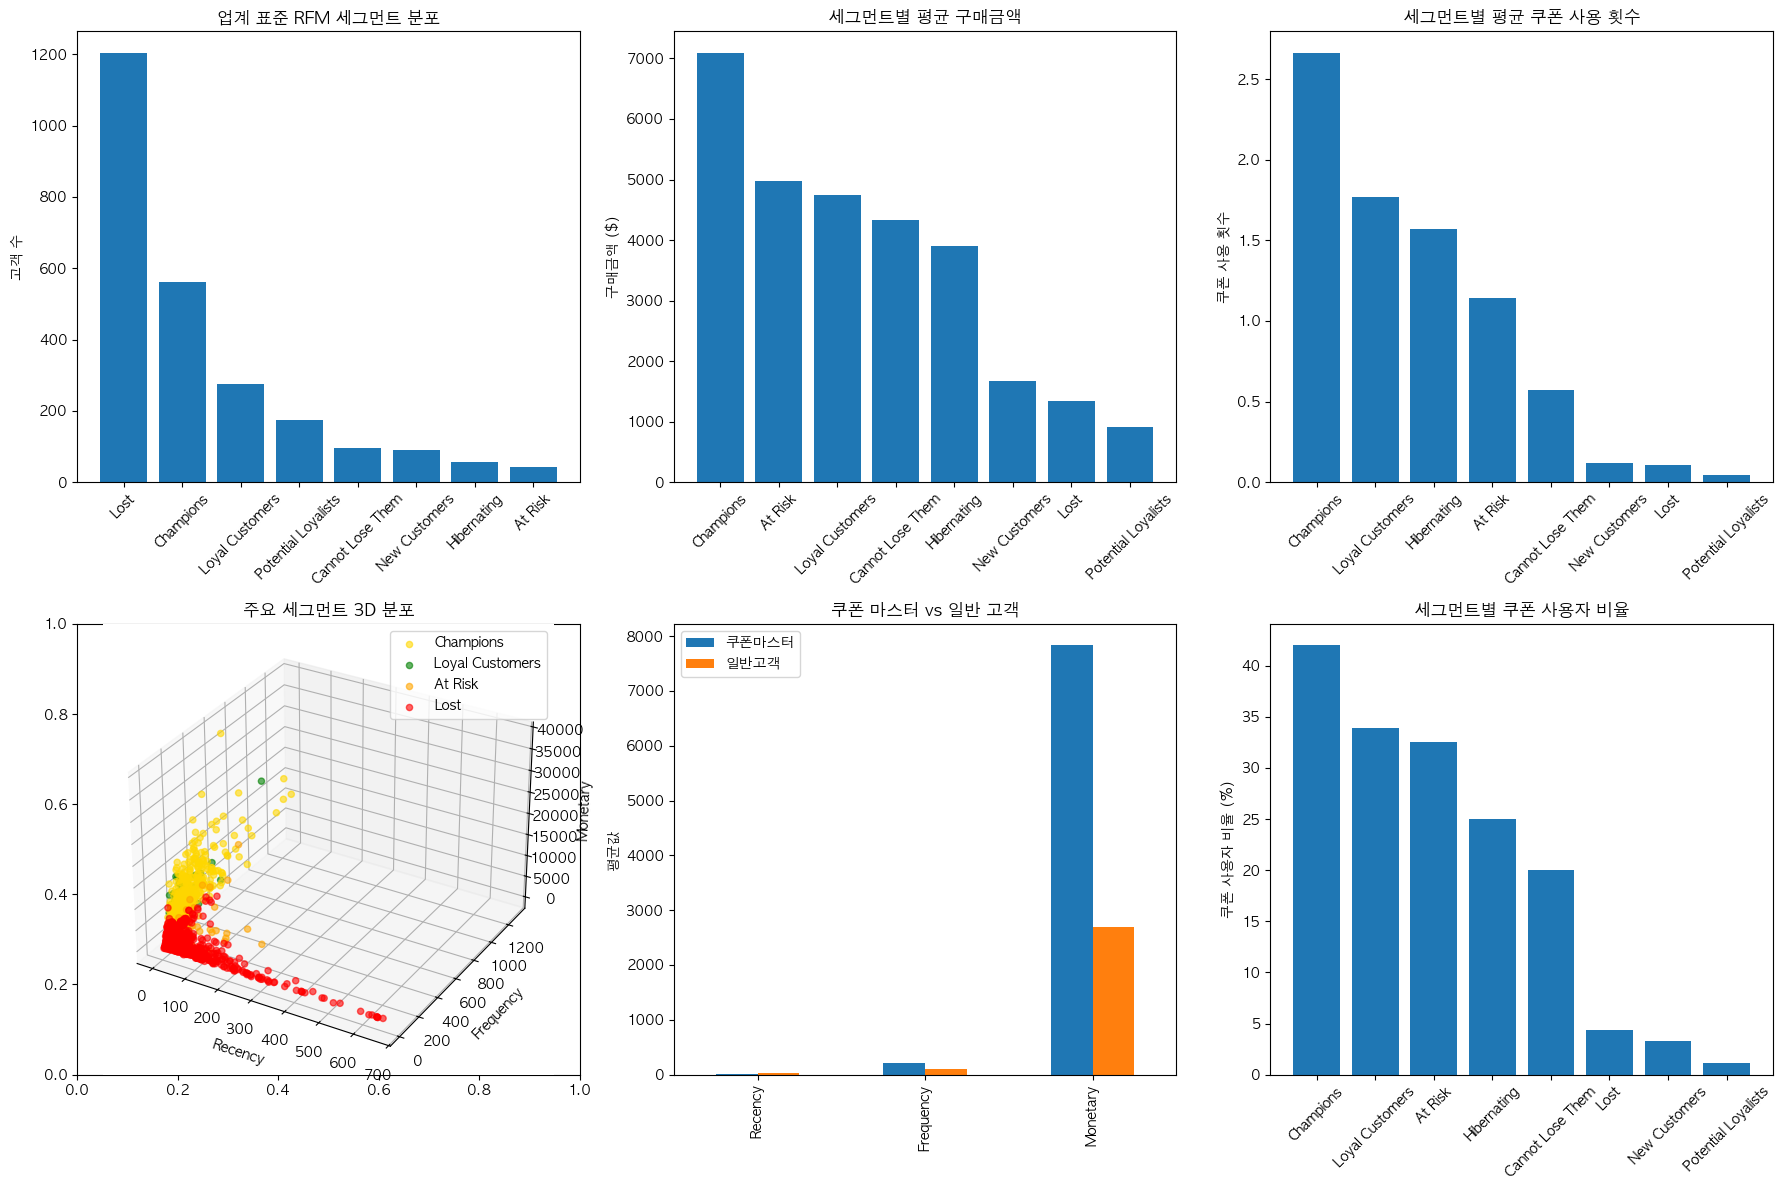


=== 세그먼트별 마케팅 전략 ===

🎯 Lost (1204명):
   목표: 저비용 리타겟팅
   전략: 브랜드 인지도 캠페인
   예산배분: 1%
   예상ROI: 매우낮음

🎯 Champions (562명):
   목표: VIP 유지 및 브랜드 어드보케이트 육성
   전략: 프리미엄 혜택, 얼리 액세스, 추천 프로그램
   예산배분: 20%
   예상ROI: 높음

🎯 Loyal Customers (274명):
   목표: Champions로 승격
   전략: 업셀링, 크로스셀링, 로열티 프로그램
   예산배분: 25%
   예상ROI: 높음

🎯 Potential Loyalists (175명):
   목표: Loyal Customers로 전환
   전략: 멤버십 혜택, 개인화 추천
   예산배분: 20%
   예상ROI: 중간

🎯 Cannot Lose Them (95명):
   목표: 긴급 윈백
   전략: 개인화 오퍼, 직접 연락
   예산배분: 7%
   예상ROI: 중간

🎯 New Customers (91명):
   목표: 관계 구축 및 재구매 유도
   전략: 온보딩, 교육 콘텐츠, 첫 구매 할인
   예산배분: 15%
   예상ROI: 중간

🎯 Hibernating (56명):
   목표: 재활성화
   전략: 재참여 캠페인, 브랜드 리마인더
   예산배분: 2%
   예상ROI: 낮음

🎯 At Risk (43명):
   목표: 이탈 방지
   전략: 윈백 캠페인, 특별 할인
   예산배분: 10%
   예상ROI: 낮음-중간

표준 RFM 분석 결과 저장:
  standard_rfm_segments.csv: 2500명
  segment_profiles.csv: 8 세그먼트
=== 업계 표준 RFM 분석 완료! ===

🎯 핵심 발견:
  Champions: 562명
  쿠폰 마스터: 160명
  이탈 위험: 138명

다음 단계: 세그먼트별 나이브 베이즈 성능 검증


In [1]:
# %%
# 업계 표준 RFM 분석 - 쿠폰 특성 결합
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

print("업계 표준 RFM 분석 시작! 🎯")

# %%
# 1. 기존 RFM 데이터 로딩

features_path = '../data/features/'
rfm_enhanced = pd.read_csv(f'{features_path}rfm_clusters.csv')

print(f"RFM 데이터 로딩: {len(rfm_enhanced)}명")
print(f"기본 통계:")
print(rfm_enhanced[['Recency', 'Frequency', 'Monetary']].describe())

# %%
# 2. 업계 표준 RFM 점수 계산

def create_standard_rfm_scores(df):
    """업계 표준 RFM 점수 (1-5점) 계산"""
    df = df.copy()
    
    # R점수: Recency가 낮을수록 좋음 (최근 구매)
    df['R_score'] = pd.qcut(df['Recency'], 5, labels=[5,4,3,2,1], duplicates='drop')
    
    # F점수: Frequency가 높을수록 좋음 
    df['F_score'] = pd.qcut(df['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5], duplicates='drop')
    
    # M점수: Monetary가 높을수록 좋음
    df['M_score'] = pd.qcut(df['Monetary'].rank(method='first'), 5, labels=[1,2,3,4,5], duplicates='drop')
    
    # RFM 조합 생성
    df['RFM'] = df['R_score'].astype(str) + df['F_score'].astype(str) + df['M_score'].astype(str)
    
    return df

rfm_standard = create_standard_rfm_scores(rfm_enhanced)

print("표준 RFM 점수 계산 완료!")
print(f"RFM 조합 예시: {rfm_standard['RFM'].head()}")

# %%
# 3. 업계 표준 세그먼트 분류

def rfm_to_standard_segment(rfm_score):
    """RFM 점수를 표준 세그먼트로 변환"""
    
    # Champions: 최고 고객 (RFM 모두 높음)
    if rfm_score in ['555', '554', '544', '545', '454', '455', '445', '534', '535', '434']:
        return 'Champions'
    
    # Loyal Customers: 충성 고객 (높은 F, M + 적당한 R)
    elif rfm_score in ['543', '444', '435', '355', '354', '345', '344', '335', '443', '434']:
        return 'Loyal Customers'
    
    # Potential Loyalists: 잠재 충성 고객 (좋은 구매력, 최근 구매)
    elif rfm_score in ['512', '511', '422', '421', '412', '411', '522', '521', '513', '423']:
        return 'Potential Loyalists'
    
    # New Customers: 신규 고객 (최근 구매, 낮은 F)
    elif rfm_score in ['414', '413', '414', '324', '323', '322', '231', '241', '251']:
        return 'New Customers'
    
    # At Risk: 이탈 위험 (과거 좋은 고객, 최근 미구매)
    elif rfm_score in ['155', '144', '214', '215', '115', '114', '113', '145', '135']:
        return 'At Risk'
    
    # Cannot Lose Them: 놓치면 안 될 고객 (높은 구매력, 최근 미구매)
    elif rfm_score in ['255', '154', '245', '244', '253', '252', '243', '242']:
        return 'Cannot Lose Them'
    
    # Hibernating: 휴면 고객 (과거 구매, 장기 미구매)
    elif rfm_score in ['155', '144', '234', '235', '134', '135', '124', '125']:
        return 'Hibernating'
    
    # Lost: 완전 이탈 고객 (모든 지표 낮음)
    else:
        return 'Lost'

# 표준 세그먼트 적용
rfm_standard['Standard_Segment'] = rfm_standard['RFM'].apply(rfm_to_standard_segment)

print("표준 세그먼트 분류 완료!")

# %%
# 4. 표준 세그먼트 분포 확인

segment_summary = rfm_standard['Standard_Segment'].value_counts()
segment_ratio = rfm_standard['Standard_Segment'].value_counts(normalize=True) * 100

print("=== 업계 표준 RFM 세그먼트 분포 ===")
print(f"{'세그먼트':<20} {'고객수':<8} {'비율(%)':<8}")
print("-" * 40)

for segment in segment_summary.index:
    count = segment_summary[segment]
    ratio = segment_ratio[segment]
    print(f"{segment:<20} {count:<8} {ratio:<8.1f}")

# %%
# 5. 세그먼트별 특성 분석

segment_profile = rfm_standard.groupby('Standard_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'coupon_usage_count': 'mean',
    'campaigns_participated': 'mean',
    'coupon_efficiency': 'mean'
}).round(1)

print("\n=== 세그먼트별 특성 분석 ===")
print(segment_profile)

# %%
# 6. 쿠폰 특성 추가 분류

def add_coupon_modifier(row):
    """쿠폰 사용 패턴에 따른 세분화"""
    base_segment = row['Standard_Segment']
    coupon_usage = row['coupon_usage_count']
    
    if coupon_usage >= 5:
        return f"{base_segment}_쿠폰마스터"
    elif coupon_usage >= 2:
        return f"{base_segment}_쿠폰활용"
    elif coupon_usage >= 1:
        return f"{base_segment}_쿠폰가끔"
    else:
        return f"{base_segment}_쿠폰미사용"

rfm_standard['Enhanced_Segment'] = rfm_standard.apply(add_coupon_modifier, axis=1)

# 쿠폰 강화 세그먼트 분포
enhanced_summary = rfm_standard['Enhanced_Segment'].value_counts().head(15)

print("\n=== 상위 15개 쿠폰 강화 세그먼트 ===")
for segment, count in enhanced_summary.items():
    ratio = count / len(rfm_standard) * 100
    print(f"{segment:<30} {count:>4}명 ({ratio:>4.1f}%)")

# %%
# 7. 핵심 세그먼트 분석

print("\n=== 핵심 세그먼트 상세 분석 ===")

# Champions 분석
champions = rfm_standard[rfm_standard['Standard_Segment'] == 'Champions']
print(f"\n🏆 Champions ({len(champions)}명, {len(champions)/len(rfm_standard)*100:.1f}%):")
print(f"  평균 R: {champions['Recency'].mean():.1f}일")
print(f"  평균 F: {champions['Frequency'].mean():.1f}회") 
print(f"  평균 M: ${champions['Monetary'].mean():.0f}")
print(f"  평균 쿠폰 사용: {champions['coupon_usage_count'].mean():.1f}회")

# 쿠폰 마스터들 (모든 세그먼트에서)
coupon_masters = rfm_standard[rfm_standard['coupon_usage_count'] >= 5]
print(f"\n🔥 쿠폰 마스터 ({len(coupon_masters)}명, {len(coupon_masters)/len(rfm_standard)*100:.1f}%):")
print("  세그먼트별 분포:")
master_segments = coupon_masters['Standard_Segment'].value_counts()
for segment, count in master_segments.items():
    print(f"    {segment}: {count}명")

# At Risk + Cannot Lose Them (우선 관리 대상)
at_risk = rfm_standard[rfm_standard['Standard_Segment'].isin(['At Risk', 'Cannot Lose Them'])]
print(f"\n⚠️ 우선 관리 대상 ({len(at_risk)}명, {len(at_risk)/len(rfm_standard)*100:.1f}%):")
print(f"  At Risk: {len(rfm_standard[rfm_standard['Standard_Segment'] == 'At Risk'])}명")
print(f"  Cannot Lose Them: {len(rfm_standard[rfm_standard['Standard_Segment'] == 'Cannot Lose Them'])}명")

# %%
# 8. 시각화

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 8-1. 표준 세그먼트 분포
segment_counts = rfm_standard['Standard_Segment'].value_counts()
axes[0,0].bar(range(len(segment_counts)), segment_counts.values)
axes[0,0].set_title('업계 표준 RFM 세그먼트 분포')
axes[0,0].set_xticks(range(len(segment_counts)))
axes[0,0].set_xticklabels(segment_counts.index, rotation=45)
axes[0,0].set_ylabel('고객 수')

# 8-2. 세그먼트별 평균 구매금액
avg_monetary = rfm_standard.groupby('Standard_Segment')['Monetary'].mean().sort_values(ascending=False)
axes[0,1].bar(range(len(avg_monetary)), avg_monetary.values)
axes[0,1].set_title('세그먼트별 평균 구매금액')
axes[0,1].set_xticks(range(len(avg_monetary)))
axes[0,1].set_xticklabels(avg_monetary.index, rotation=45)
axes[0,1].set_ylabel('구매금액 ($)')

# 8-3. 세그먼트별 쿠폰 사용률
coupon_rate = rfm_standard.groupby('Standard_Segment')['coupon_usage_count'].mean().sort_values(ascending=False)
axes[0,2].bar(range(len(coupon_rate)), coupon_rate.values)
axes[0,2].set_title('세그먼트별 평균 쿠폰 사용 횟수')
axes[0,2].set_xticks(range(len(coupon_rate)))
axes[0,2].set_xticklabels(coupon_rate.index, rotation=45)
axes[0,2].set_ylabel('쿠폰 사용 횟수')

# 8-4. RFM 3D 산점도 (주요 세그먼트만)
from mpl_toolkits.mplot3d import Axes3D
main_segments = ['Champions', 'Loyal Customers', 'At Risk', 'Lost']
colors = ['gold', 'green', 'orange', 'red']

ax = fig.add_subplot(2, 3, 4, projection='3d')
for i, segment in enumerate(main_segments):
    if segment in rfm_standard['Standard_Segment'].values:
        segment_data = rfm_standard[rfm_standard['Standard_Segment'] == segment]
        ax.scatter(segment_data['Recency'], segment_data['Frequency'], segment_data['Monetary'], 
                  c=colors[i], label=segment, alpha=0.6, s=20)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary') 
ax.set_title('주요 세그먼트 3D 분포')
ax.legend()

# 8-5. 쿠폰 마스터 vs 일반 고객
coupon_comparison = pd.DataFrame({
    '쿠폰마스터': rfm_standard[rfm_standard['coupon_usage_count'] >= 5][['Recency', 'Frequency', 'Monetary']].mean(),
    '일반고객': rfm_standard[rfm_standard['coupon_usage_count'] < 2][['Recency', 'Frequency', 'Monetary']].mean()
})

coupon_comparison.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('쿠폰 마스터 vs 일반 고객')
axes[1,1].set_ylabel('평균값')
axes[1,1].legend()

# 8-6. 세그먼트별 쿠폰 사용자 비율
segments_coupon_users = rfm_standard.groupby('Standard_Segment').apply(
    lambda x: (x['coupon_usage_count'] > 0).mean() * 100
).sort_values(ascending=False)

axes[1,2].bar(range(len(segments_coupon_users)), segments_coupon_users.values)
axes[1,2].set_title('세그먼트별 쿠폰 사용자 비율')
axes[1,2].set_xticks(range(len(segments_coupon_users)))
axes[1,2].set_xticklabels(segments_coupon_users.index, rotation=45)
axes[1,2].set_ylabel('쿠폰 사용자 비율 (%)')

plt.tight_layout()
plt.show()

# %%
# 9. 마케팅 전략 매핑

marketing_strategy = {
    'Champions': {
        '목표': 'VIP 유지 및 브랜드 어드보케이트 육성',
        '전략': '프리미엄 혜택, 얼리 액세스, 추천 프로그램',
        '예산배분': '20%',
        '예상ROI': '높음'
    },
    'Loyal Customers': {
        '목표': 'Champions로 승격',
        '전략': '업셀링, 크로스셀링, 로열티 프로그램',
        '예산배분': '25%', 
        '예상ROI': '높음'
    },
    'Potential Loyalists': {
        '목표': 'Loyal Customers로 전환',
        '전략': '멤버십 혜택, 개인화 추천',
        '예산배분': '20%',
        '예상ROI': '중간'
    },
    'New Customers': {
        '목표': '관계 구축 및 재구매 유도',
        '전략': '온보딩, 교육 콘텐츠, 첫 구매 할인',
        '예산배분': '15%',
        '예상ROI': '중간'
    },
    'At Risk': {
        '목표': '이탈 방지',
        '전략': '윈백 캠페인, 특별 할인',
        '예산배분': '10%',
        '예상ROI': '낮음-중간'
    },
    'Cannot Lose Them': {
        '목표': '긴급 윈백',
        '전략': '개인화 오퍼, 직접 연락',
        '예산배분': '7%',
        '예상ROI': '중간'
    },
    'Hibernating': {
        '목표': '재활성화',
        '전략': '재참여 캠페인, 브랜드 리마인더',
        '예산배분': '2%',
        '예상ROI': '낮음'
    },
    'Lost': {
        '목표': '저비용 리타겟팅',
        '전략': '브랜드 인지도 캠페인',
        '예산배분': '1%',
        '예상ROI': '매우낮음'
    }
}

print("\n=== 세그먼트별 마케팅 전략 ===")
for segment in segment_summary.index:
    if segment in marketing_strategy:
        strategy = marketing_strategy[segment]
        count = segment_summary[segment]
        print(f"\n🎯 {segment} ({count}명):")
        for key, value in strategy.items():
            print(f"   {key}: {value}")

# %%
# 10. 결과 저장

features_path = '../data/features/'

# 표준 RFM 결과 저장
rfm_standard.to_csv(f'{features_path}standard_rfm_segments.csv', index=False)

# 세그먼트 프로파일 저장
segment_profile.to_csv(f'{features_path}segment_profiles.csv')

print(f"\n표준 RFM 분석 결과 저장:")
print(f"  standard_rfm_segments.csv: {len(rfm_standard)}명")
print(f"  segment_profiles.csv: {len(segment_profile)} 세그먼트")

# %%
print("=== 업계 표준 RFM 분석 완료! ===")
print("\n🎯 핵심 발견:")
print(f"  Champions: {len(rfm_standard[rfm_standard['Standard_Segment'] == 'Champions'])}명")
print(f"  쿠폰 마스터: {len(rfm_standard[rfm_standard['coupon_usage_count'] >= 5])}명")
print(f"  이탈 위험: {len(rfm_standard[rfm_standard['Standard_Segment'].isin(['At Risk', 'Cannot Lose Them'])])}명")
print("\n다음 단계: 세그먼트별 나이브 베이즈 성능 검증")

In [2]:
# 쿠폰 마스터들이 어느 세그먼트에 속하는지 확인
coupon_masters_by_segment = rfm_standard[rfm_standard['coupon_usage_count'] >= 5]['Standard_Segment'].value_counts()
print("쿠폰 마스터의 세그먼트별 분포:")
for segment, count in coupon_masters_by_segment.items():
    print(f"  {segment}: {count}명")

쿠폰 마스터의 세그먼트별 분포:
  Champions: 99명
  Loyal Customers: 36명
  Lost: 8명
  Hibernating: 7명
  At Risk: 4명
  Cannot Lose Them: 4명
  Potential Loyalists: 1명
  New Customers: 1명
